In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [78]:
'''
location
networkx가 위치를 dict로 받기 때문에 raw data를 dict로 바꿈
'''
location = {}
for x,y,z in zip(nodes['station number'], nodes['latitude'], nodes['longitude']):
    location[x] = [z, y]


def weight(network, zoom):
    '''
    weight의 정배수로 network를 그리면 edge가 너무 비대해져서
    zoom 만큼 곱한 값을 나타냄.
    network에 바로 곱하면 오류나서 사용함.
    '''
    weights = nx.get_edge_attributes(network, 'number').values()
    weights = list(weights)
    for i in range(len(weights)):
        weights[i] = weights[i]* zoom
    return weights

# n 보다 큰 것만 생각하기
def new_links(data, n):
    data = data[data['number'] > n]
    return data

# distance
def distance(a, b):
    return math.sqrt((a['latitude']-b['latitude'])**2+(a['longitude']-b['longitude'])**2)

# 시작, 끝, count 만 나타내는 리스트 만들기
def simple_list(data):
    a = np.array([data[:,1],data[:,3]]).T.astype(np.int)

    item = np.unique(a, return_counts=True, axis = 0)[0]
    count = np.unique(a, return_counts=True, axis = 0)[1]

    return np.column_stack((item, count))

In [80]:
'''
data load
순서대로
노드,
평일, 주말, 평일 6~9, 평일 17~20
'''
nodes = pd.read_csv('../data/station(21.01.31).csv')
links_on = np.load('../raw_data/data_2_on.npy', allow_pickle = 1)
links_off = np.load('../raw_data/data_2_off.npy', allow_pickle = 1)

links1 = np.array([links_on[:,1],links_on[:,3]]).T
links2 = np.array([links_off[:,1],links_off[:,3]]).T

In [81]:
# make network
G1 = nx.DiGraph()
for path in links1:
    nx.add_path(G1, path)

G2 = nx.DiGraph()
for path in links2:
    nx.add_path(G2, path)

In [87]:
# calculate shortest path
short1 = nx.shortest_path(G1)
short2 = nx.shortest_path(G2)

In [114]:
lili1 = []
for i in links1[:,0]:
    for j in links1[i]:
        try:
            lili1.append(len(short1[i][j]))
        except:
            pass

lili2 = []
for i in links2[:,0]:
    for j in links2[i]:
        try:
            lili2.append(len(short2[i][j]))
        except:
            pass

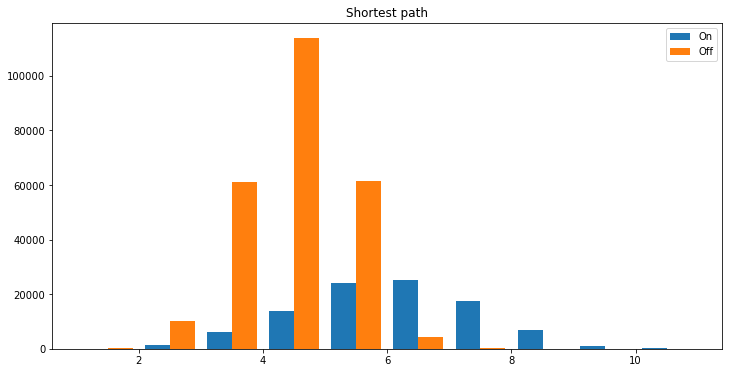

In [123]:
plt.figure(figsize = (12, 6))

plt.hist([lili1, lili2], label=['On', 'Off'])

plt.title('Shortest path')
plt.legend()
plt.show()

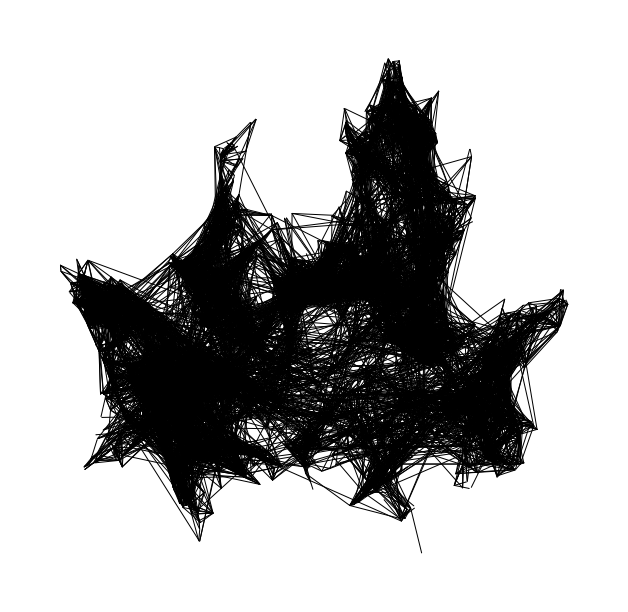

In [79]:
plt.figure(figsize = (11,11))

nx.draw_networkx(G, 
                 location, 
                 node_color='black', 
                 node_size=0, 
                 with_labels = False, 
                 arrowsize = 0.1,
                 width = 1)
plt.axis('off')
plt.show()